#  SCC0230 - Inteligência Artificial
### Trabalho Prático 2: Mineração de Dados

**Integrantes:**

* Ana Paula de Abreu Batista - 12688424
* Arthur Henrique Silva de Araujo - 14651458
* Arthur Filliettaz Mendes - 12532055
* Italo Carlos Martins Bresciani - 15461782
* Julio Cesar Alves Araujo Fuganti - 15638792
* Thiago Pasquotto Tavares - 15490194
* Victor Silva Botelho - 15645421


---

## ️1. **Introdução**

Este projeto tem como objetivo **prever se vai chover ou não em São Carlos** em cada dia, usando dados meteorológicos históricos disponibilizados pelo **INMET – Instituto Nacional de Meteorologia**.

A tarefa é formulada como um **problema de classificação binária**, onde:

* **CHOVEU = 1** → houve precipitação (> 0 mm)
* **CHOVEU = 0** → não houve precipitação

O modelo final adotado foi um **Random Forest Classifier**, com balanceamento entre as classes.

---

## 2. **Descrição e Aquisição dos Dados**

  ### 2.1 Fonte original

  Os dados vêm do portal oficial do INMET:

  ```
  https://portal.inmet.gov.br/dadoshistoricos
  ```

  ### 2.2 Período dos dados

  O código baixa arquivos ZIP contendo dados horários de **2006 a 2025**.
  Somente arquivos contendo **"SAO CARLOS"** no nome foram processados.

  ### 2.3 Quem produz o dataset

  * **Instituto Nacional de Meteorologia (INMET)**
  * Ministério da Agricultura, Pecuária e Abastecimento
  * Dados gerados por estações automáticas oficiais

  ### 2.4 Quem já utilizou esses dados

  Os dados meteorológicos do INMET são amplamente usados em:

  * Modelos de previsão do tempo
  * Agrometeorologia
  * Pesquisas científicas (IA, climatologia, hidrologia)
  * Planejamento urbano
  * Energia solar/eólica

  Ou seja, é um dataset público amplamente utilizado.

---

## 3. **Construção do Dataset Final**

O pipeline de dados inclui:

  ### 3.1 Leitura e Unificação

* Baixamos todos os ZIPs disponíveis
* Filtramos apenas arquivos com `"SAO CARLOS"`
* Padronizamos diferenças de cabeçalho ao longo dos anos
* Removemos colunas completamente vazias
* Substituimos vírgula por ponto em colunas numéricas
* Convertemos `-9999` e variações para `NaN`
* Adicionamos coluna **Ano**
* Juntamos tudo em um único dataset:
  `dados_sao_carlos_unificados.csv`


### 3.2 Tamanho do Dataset Unificado

```
Total de linhas: 167952
Total de colunas: 20
```


### 3.3 Agregação Diária

Os dados horários foram agrupados por dia:

* **Precipitação** → soma
* **Demais variáveis** → média

O resultado diário foi salvo em:

```
dados_sao_carlos_diario.csv
```

```
Total de dias: 6998
```

---

## 4. **Tratamento e Limpeza dos Dados**

As principais etapas:

* Remoção de colunas redundantes pertencentes a versões antigas do INMET
* Conversão de `Data` para datetime
* Interpolação temporal (`interpolate(method='time')`)
* Preenchimento com `bfill()` e `ffill()`
* Dataset final: **sem valores ausentes**

---

## 5. **Quantidade de Exemplos e Atributos**

Para o dataset tratado:

* **nº de exemplos  = 6998 dias**
* **nº de atributos X = 11 colunas**

---

## 6. **Variável Alvo**

A variável a ser predita é:

### **CHOVEU (0 ou 1)**

Criada como:

```python
df_dia['CHOVEU'] = (df_dia['PRECIPITACAO TOTAL, HORARIO (mm)'] > 0).astype(int)
```

---

## 7. **Balanceamento e Classe Majoritária**

A análise exploratória revela:

* A maior parte dos dias **não tem chuva** → **classe 0 é majoritária (66,46%)**
* O dataset é um pouco **desbalanceado**

Para compensar, o modelo usa:

```python
class_weight='balanced'
```

---

## 8. **Paradigma do Problema**

Este é um problema de:

### **Aprendizado Supervisionado**

### **Classificação Binária**

Por quê?

* Temos pares (entrada → saída) conhecidos
* Objetivo: prever uma categoria discreta (chuva vs. não chuva)

---

## 9. **Separação Treino–Teste**

A divisão foi feita assim:

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
```

Ou seja:

* **70% → treino**
* **30% → teste**
* `random_state=42` garante reprodutibilidade

---

## 10. **Modelo Utilizado: Random Forest**

### Por que escolher Random Forest?

* Robusto a ruídos
* Resistente a overfitting
* Funciona bem com variáveis correlacionadas
* Não precisa normalização
* Funciona bem em datasets tabulares
* Suporta balanceamento interno
* Oferece **importância das variáveis**

---

## 11. **Como o Random Forest Funciona**

### 11.1 **Coleção de Árvores de Decisão**

O modelo cria diversas árvores independentes:

```python
n_estimators = 100
```

### 11.2 **Bagging (Bootstrap Aggregation)**

Cada árvore recebe:

* Uma amostra aleatória dos dados
* Um conjunto aleatório de atributos

→ reduz overfitting

### 11.3 **Crescimento das Árvores**

Cada árvore decide divisões sucessivas, tentando separar chuva vs. não chuva.

### 11.4 **Votação em Conjunto**

Cada árvore produz uma saída (0 ou 1).
A previsão final é a **classe mais votada**.

### 11.5 **Vantagens**

* Alta precisão
* Generalização robusta
* Não depende de ajustes delicados de hiperparâmetros

---

## 12. **Resultados do Modelo**

* Acurácia: 0.84
* Matriz de confusão
* Classification report

### **12.1 Matriz de Confusão (estrutura)**

```
[[1259(TN) 147(FP)]
 [ 188(FN)  506(TP)]]
```

* **TN** = previu que não choveu e realmente não choveu
* **TP** = previu chuva e realmente choveu
* **FP** = falso alarme
* **FN** = falha em prever chuva

---

##  13. **Importância das Variáveis**

O Random Forest fornece um ranking das variáveis mais relevantes.

Em geral, as mais importantes para chuva são:

1. Umidade relativa
2. Temperatura do ponto de orvalho
3. Radiação global
4. Pressão atmosférica
5. Temperatura do ar

O gráfico exibido pelo código (`sns.barplot`) mostra isso visualmente.

---

## 14. **Conclusões**

* O dataset cobre duas décadas de dados meteorológicos reais
* É naturalmente desbalanceado (mais dias sem chuva)
* O problema foi corretamente formulado como classificação binária
* Random Forest é apropriado e robusto para este cenário
* A limpeza e interpolação foram necessárias devido aos muitos valores faltantes
* As principais variáveis responsáveis por prever chuva foram identificadas

---


# 1 Importações e Bibliotecas

In [ ]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import os
import time
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2 Aquisição dos dados

In [ ]:

# URL base do portal do INMET
BASE_URL = "https://portal.inmet.gov.br/dadoshistoricos"
DESTINO = "dados_sao_carlos"

# criando a pasta de destino
os.makedirs(DESTINO, exist_ok=True)

# obtendo o HTML da página principal
try:
    res = requests.get(BASE_URL)
    res.raise_for_status()
except requests.exceptions.RequestException as e:
    print(f"Erro ao acessar a página: {e}")
    exit()

soup = BeautifulSoup(res.text, "html.parser")

# procurando todos os links para arquivos ZIP
links = [a["href"] for a in soup.find_all("a", href=True) if a["href"].endswith(".zip")]

print(f"Encontrados {len(links)} arquivos ZIP no site do INMET.")

for link in links:
    # corrigindo URLs relativas
    if not link.startswith("http"):
        link = "https://portal.inmet.gov.br" + link

    print(f"\n Baixando: {link}")

    # loop para download
    for attempt in range(3):  # 3 tentativas
        try:
            r = requests.get(link, stream=True)  # usando stream=True para arquivos grandes
            r.raise_for_status()
            break  # se der certo, quebra o loop
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt+1} failed: {e}")
            if attempt < 2:
                time.sleep(5)  # aguardar antes de tentar novamente

    if 'r' in locals() and r.status_code == 200:
        # lendo ZIP na memória
        try:
            with zipfile.ZipFile(io.BytesIO(r.content)) as z:
                for file_name in z.namelist():
                    if "SAO CARLOS" in file_name.upper() and file_name.endswith(".CSV"):
                        print(f"→ Extraindo {file_name}")
                        z.extract(file_name, DESTINO)
        except zipfile.BadZipFile as e:
            print(f"Erro ao processar arquivo do link {link}: {e}")
        finally:
            r.close() # fechando stream
    else:
        print(f"Falha ao baixar {link} após muitas tentativas.")


print("\n Download completo! Arquivos salvos:", DESTINO)

Encontrados 26 arquivos ZIP no site do INMET.

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2000.zip

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2001.zip

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2002.zip

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2003.zip

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2004.zip

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2005.zip

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2006.zip
→ Extraindo 2006/INMET_SE_SP_A711_SAO CARLOS_04-09-2006_A_31-12-2006.CSV

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2007.zip
→ Extraindo 2007/INMET_SE_SP_A711_SAO CARLOS_01-01-2007_A_31-12-2007.CSV

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2008.zip
→ Extraindo 2008/INMET_SE_SP_A711_SAO CARLOS_01-01-2008_A_31-12-2008.CSV

 Baixando: https://portal.inmet.gov.br/uploads/dadoshistoricos/2009.zip
→ Ext

In [ ]:
import os
import re
import shutil

# caminho base onde os CSVs foram extraídos
base_dir = "dados_sao_carlos"

# criando pastas de 2020 a 2025
for ano in range(2020, 2026):
    pasta_ano = os.path.join(base_dir, str(ano))
    os.makedirs(pasta_ano, exist_ok=True)

# listando arquivos diretamente dentro de dados_sao_carlos
arquivos = os.listdir(base_dir)

for arquivo in arquivos:
    caminho_arquivo = os.path.join(base_dir, arquivo)

    # só processa arquivos (ignorar pastas)
    if not os.path.isfile(caminho_arquivo):
        continue

    # só pega CSVs
    if not arquivo.upper().endswith(".CSV"):
        continue

    # tentar extrair o ano do nome do arquivo
    # ex: ...01-01-2023_A_31-12-2023.CSV
    match = re.search(r'(\d{4})', arquivo)
    if match:
        ano = match.group(1)

        # só queremos anos entre 2020–2025
        if ano.isdigit() and 2020 <= int(ano) <= 2025:
            destino = os.path.join(base_dir, ano, arquivo)

            print(f"Movendo {arquivo} → pasta {ano}")
            shutil.move(caminho_arquivo, destino)


Movendo INMET_SE_SP_A711_SAO CARLOS_01-01-2020_A_31-12-2020.CSV → pasta 2020
Movendo INMET_SE_SP_A711_SAO CARLOS_01-01-2021_A_31-12-2021.CSV → pasta 2021
Movendo INMET_SE_SP_A711_SAO CARLOS_01-01-2025_A_31-10-2025.CSV → pasta 2025
Movendo INMET_SE_SP_A711_SAO CARLOS_01-01-2022_A_31-12-2022.CSV → pasta 2022
Movendo INMET_SE_SP_A711_SAO CARLOS_01-01-2023_A_31-12-2023.CSV → pasta 2023
Movendo INMET_SE_SP_A711_SAO CARLOS_01-01-2024_A_31-12-2024.CSV → pasta 2024


In [ ]:

# caminho base
base_path = "dados_sao_carlos"

# modelo padrão (2019–2025)
colunas_padrao = [
    "Data", "Hora UTC", "PRECIPITACAO TOTAL, HORARIO (mm)",
    "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",
    "PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)",
    "PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)",
    "RADIACAO GLOBAL (Kj/m²)",
    "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",
    "TEMPERATURA DO PONTO DE ORVALHO (°C)",
    "TEMPERATURA MAXIMA NA HORA ANT. (AUT) (°C)",
    "TEMPERATURA MINIMA NA HORA ANT. (AUT) (°C)",
    "TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)",
    "TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)",
    "UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)",
    "UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)",
    "UMIDADE RELATIVA DO AR, HORARIA (%)",
    "VENTO, DIRECAO HORARIA (gr)",
    "VENTO, RAJADA MAXIMA (m/s)",
    "VENTO, VELOCIDADE HORARIA (m/s)"
]

dfs = []

# percorrendo todas as pastas de 2006–2025
for ano in range(2006, 2026):
    folder = os.path.join(base_path, str(ano))
    csvs = glob.glob(os.path.join(folder, "*.CSV"))

    for file in csvs:
        with open(file, encoding="latin1") as f:
            linhas = [next(f) for _ in range(10)]

        # identificando o tipo de cabeçalho
        if any("REGIAO" in l for l in linhas):
            skip = 8  # modelo antigo (2006–2018)
        else:
            skip = 8  # modelo novo (2019–2025)

        try:
            df = pd.read_csv(file, sep=';', skiprows=skip, encoding='latin1', low_memory=False)
        except Exception as e:
            print(f" Erro ao ler {file}: {e}")
            continue

        # removendo colunas extras vazias
        df = df.dropna(axis=1, how='all')

        # ajustando número de colunas ao padrão
        num_cols = len(df.columns)
        if num_cols != len(colunas_padrao):
            print(f" Ajustando colunas em {file} ({num_cols} colunas encontradas)")
            if num_cols > len(colunas_padrao):
                df = df.iloc[:, :len(colunas_padrao)]
            else:
                for i in range(len(colunas_padrao) - num_cols):
                    df[f"extra_{i}"] = np.nan

        df.columns = colunas_padrao

        # limpando: vírgula → ponto (-9999 → NaN)
        for col in colunas_padrao:
            if col not in ['Data', 'Hora UTC']:
                df[col] = (
                    df[col]
                    .astype(str)
                    .str.replace(',', '.', regex=False)
                    .replace(
                        ['-9999', '-9999.0', '-9999,0', '-9999,00', 'nan', '', ' '],
                        np.nan
                    )
                )
                # convertendo para float
                df[col] = pd.to_numeric(df[col], errors='coerce')

        # adicionando coluna de ano
        df["Ano"] = ano

        # removendo linhas totalmente vazias
        df = df.dropna(how='all', subset=colunas_padrao)

        dfs.append(df)

# concatenando todos os DataFrames
df_final = pd.concat(dfs, ignore_index=True)

# salvando o dataset unificado limpo
df_final.to_csv("dados_sao_carlos_unificados.csv", index=False, sep=';', encoding='utf-8-sig')

print(" Dataset salvo: dados_sao_carlos_unificados.csv")
print(f"Total de linhas: {len(df_final)}")
print(f"Total de colunas: {len(df_final.columns)}")

df_final.head()


 Dataset salvo: dados_sao_carlos_unificados.csv
Total de linhas: 167952
Total de colunas: 20


,Data,Hora UTC,"PRECIPITACAO TOTAL, HORARIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIRECAO HORARIA (gr)","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Ano
0,2006-09-04,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
1,2006-09-04,01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
2,2006-09-04,02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
3,2006-09-04,03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
4,2006-09-04,04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006


In [ ]:

# lendo o dataset unificado
df = pd.read_csv("dados_sao_carlos_unificados.csv", sep=';', encoding='utf-8-sig')

# normalizando a coluna de Data (formatando e removendo espaços)
df['Data'] = df['Data'].astype(str).str.strip()
df['Data'] = df['Data'].str.replace('/', '-')
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')


# agrupamento diário (médias ignoram NaN automaticamente)
df_dia = (
    df.groupby('Data')
    .agg({
        # somando a precipitação (para detectar se choveu)
        'PRECIPITACAO TOTAL, HORARIO (mm)': 'sum',
        # médias diárias das outras variáveis
        'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'mean',
        'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'mean',
        'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'mean',
        'RADIACAO GLOBAL (Kj/m²)': 'mean',
        'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'mean',
        'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'mean',
        'TEMPERATURA MAXIMA NA HORA ANT. (AUT) (°C)': 'mean',
        'TEMPERATURA MINIMA NA HORA ANT. (AUT) (°C)': 'mean',
        'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': 'mean',
        'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'mean',
        'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'mean',
        'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'mean',
        'UMIDADE RELATIVA DO AR, HORARIA (%)': 'mean',
        'VENTO, DIRECAO HORARIA (gr)': 'mean',
        'VENTO, RAJADA MAXIMA (m/s)': 'mean',
        'VENTO, VELOCIDADE HORARIA (m/s)': 'mean',
    })
    .reset_index()
)

# criando coluna binária indicando chuva
df_dia['CHOVEU'] = (df_dia['PRECIPITACAO TOTAL, HORARIO (mm)'] > 0).astype(int)

# salvando o dataset
df_dia.to_csv("dados_sao_carlos_diario.csv", index=False, sep=';', encoding='utf-8-sig')

print(" Dataset diário salvo: dados_sao_carlos_diario.csv")
print(f"Total de dias: {len(df_dia)}")


 Dataset diário salvo: dados_sao_carlos_diario.csv
Total de dias: 6998


In [ ]:
df_dia.head(20)

,Data,"PRECIPITACAO TOTAL, HORARIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIRECAO HORARIA (gr)","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",CHOVEU
0,2006-09-04,0.0,919.900000,919.900000,919.500000,395.400000,19.800000,7.300000,21.100000,19.800000,7.600000,NaN,45.000000,3.000000,NaN,139.000000,7.000000,0.700000,0
1,2006-09-05,2.6,925.250000,925.783333,925.200000,2989.383333,17.083333,1.350000,17.516667,15.116667,2.833333,0.216667,42.833333,33.833333,36.000000,140.166667,6.160000,1.283333,1
2,2006-09-06,0.0,924.172727,924.563636,924.009091,2285.877778,18.627273,4.281818,19.820000,17.990000,4.860000,2.890000,43.181818,31.363636,38.900000,135.636364,7.700000,3.054545,0
3,2006-09-07,0.0,923.508333,923.733333,923.325000,1617.900000,15.691667,8.879167,16.425000,14.950000,9.150000,8.533333,69.208333,63.958333,66.708333,100.333333,6.725000,3.150000,0
4,2006-09-08,0.0,922.750000,922.979167,922.550000,1872.208333,19.900000,10.791667,20.525000,19.175000,11.216667,10.383333,62.208333,57.166667,59.458333,77.250000,6.041667,2.983333,0
5,2006-09-09,0.0,921.956250,922.131250,921.743750,1308.316667,18.975000,10.068750,19.575000,18.175000,10.450000,9.856250,60.687500,55.062500,57.250000,96.687500,5.912500,3.050000,0
6,2006-09-10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,2006-09-11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,2006-09-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,2006-09-13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# 3 Análise Exploratória de Dados

## 3.1 Pré processamento

In [ ]:
df_dia.shape

(6998, 19)

In [ ]:
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   6998 non-null   datetime64[ns]
 1   PRECIPITACAO TOTAL, HORARIO (mm)                       6998 non-null   float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  6604 non-null   float64       
 3   PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        6600 non-null   float64       
 4   PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       6600 non-null   float64       
 5   RADIACAO GLOBAL (Kj/m²)                                6560 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           6576 non-null   float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   6576 non-null 

In [ ]:
df_dia.columns

Index(['Data', 'PRECIPITACAO TOTAL, HORARIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIRECAO HORARIA (gr)',
       'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)',
       'CHOVEU'],
      dtype='object')

In [ ]:
df_tratado = df_dia.drop(['PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
         'TEMPERATURA MAXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT) (°C)',
         'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
         'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',], axis='columns')

In [ ]:
df_tratado.shape

(6998, 11)

In [ ]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   6998 non-null   datetime64[ns]
 1   PRECIPITACAO TOTAL, HORARIO (mm)                       6998 non-null   float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  6604 non-null   float64       
 3   RADIACAO GLOBAL (Kj/m²)                                6560 non-null   float64       
 4   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           6576 non-null   float64       
 5   TEMPERATURA DO PONTO DE ORVALHO (°C)                   6576 non-null   float64       
 6   UMIDADE RELATIVA DO AR, HORARIA (%)                    6575 non-null   float64       
 7   VENTO, DIRECAO HORARIA (gr)                            6602 non-null 

In [ ]:
(df_tratado.isna().any(axis=1).sum() / len(df)) * 100

np.float64(0.26376583785843577)

6% de dados faltantes, faremos por interpolação

In [ ]:
df_tratado['Data'] = pd.to_datetime(df_tratado['Data'])

df_tratado = df_tratado.sort_values('Data').set_index('Data')

df_tratado = df_tratado.interpolate(method='time')

df_tratado = df_tratado.bfill().ffill()

df_tratado = df_tratado.reset_index()

In [ ]:
print(f"Valores faltantes após interpolação: {df_tratado.isna().any(axis=1).sum()} of {len(df_tratado)}")

Valores faltantes após interpolação: 0 of 6998


In [ ]:
df_tratado.columns

Index(['Data', 'PRECIPITACAO TOTAL, HORARIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIRECAO HORARIA (gr)',
       'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)',
       'CHOVEU'],
      dtype='object')

Dados tratados!

## 3.2 Plots

### 3.2.1 Distribuição Choveu X Não Choveu

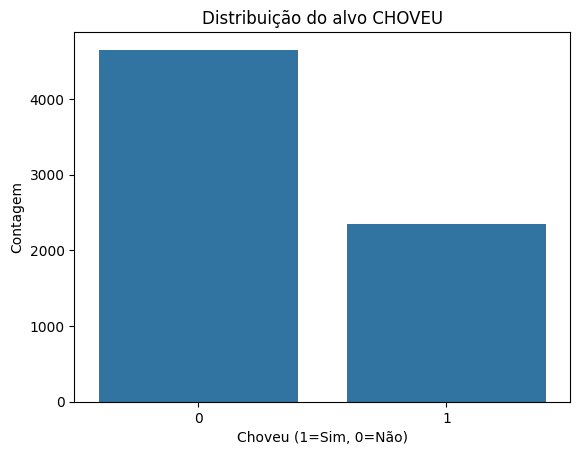

In [ ]:
sns.countplot(x='CHOVEU', data=df_tratado)
plt.title('Distribuição do alvo CHOVEU')
plt.xlabel('Choveu (1=Sim, 0=Não)')
plt.ylabel('Contagem')
plt.show()

O gráfico revela uma distribuição assimétrica: há muito mais registros sem chuva do que com chuva, mostrando um desbalanceamento moderado na variável alvo, o que deve ser levado em conta na modelagem e avaliação do classificador.

### 3.2.2 Distribuições das variáveis

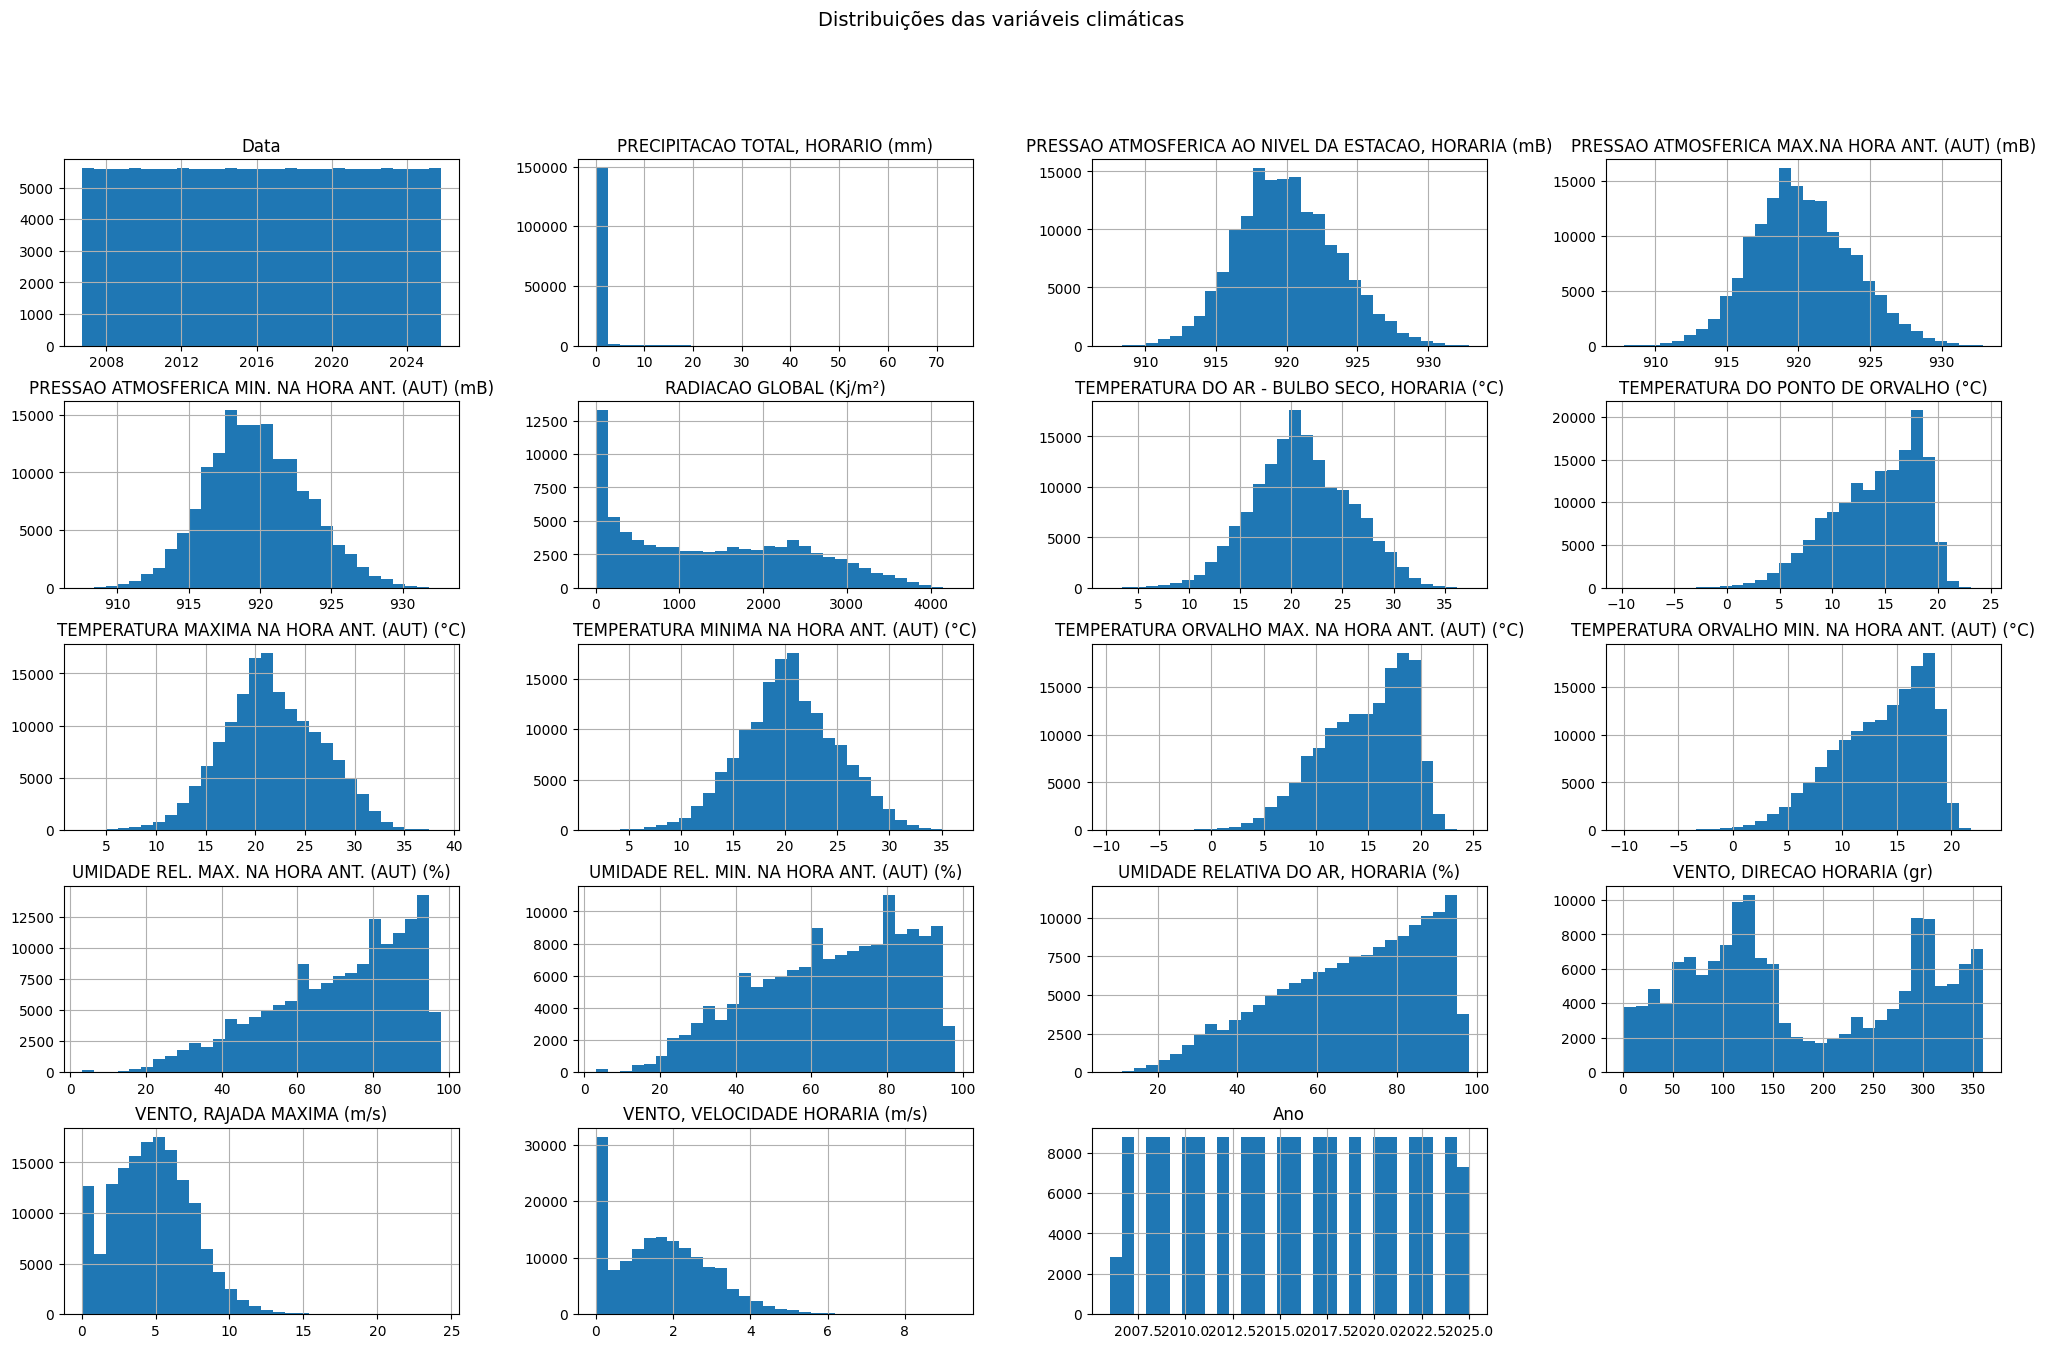

In [ ]:
df.hist(figsize=(25,15), bins=30)
plt.suptitle('Distribuições das variáveis climáticas', fontsize=14)
plt.show()

As temperaturas (máxima, mínima, bulbo seco e ponto de orvalho) apresentam formas aproximadamente normais, típicas de regiões de clima subtropical, com concentrações entre 15 °C e 25 °C e caudas que representam dias muito quentes ou frios. As variáveis de vento mostram forte assimetria à direita, indicando que a maior parte das medições registra velocidades baixas e poucas rajadas intensas, enquanto a direção do vento apresenta picos específicos, sugerindo quadrantes predominantes ao longo do ano. A umidade relativa — horária, máxima e mínima — tende a se concentrar em valores altos, refletindo a predominância de períodos úmidos, mas com maior variabilidade nos momentos de umidade mínima. Já a precipitação horária apresenta muitos valores zero e poucos eventos extremos, comportamento esperado de chuvas episódicas. A radiação global é assimétrica, com inúmeros valores baixos e uma longa cauda associada a períodos intensamente ensolarados. Por fim, as pressões atmosféricas exibem distribuições estreitas e quase normais, indicando estabilidade nas condições atmosféricas e nos instrumentos de medição.

### 3.2.3 Correlações

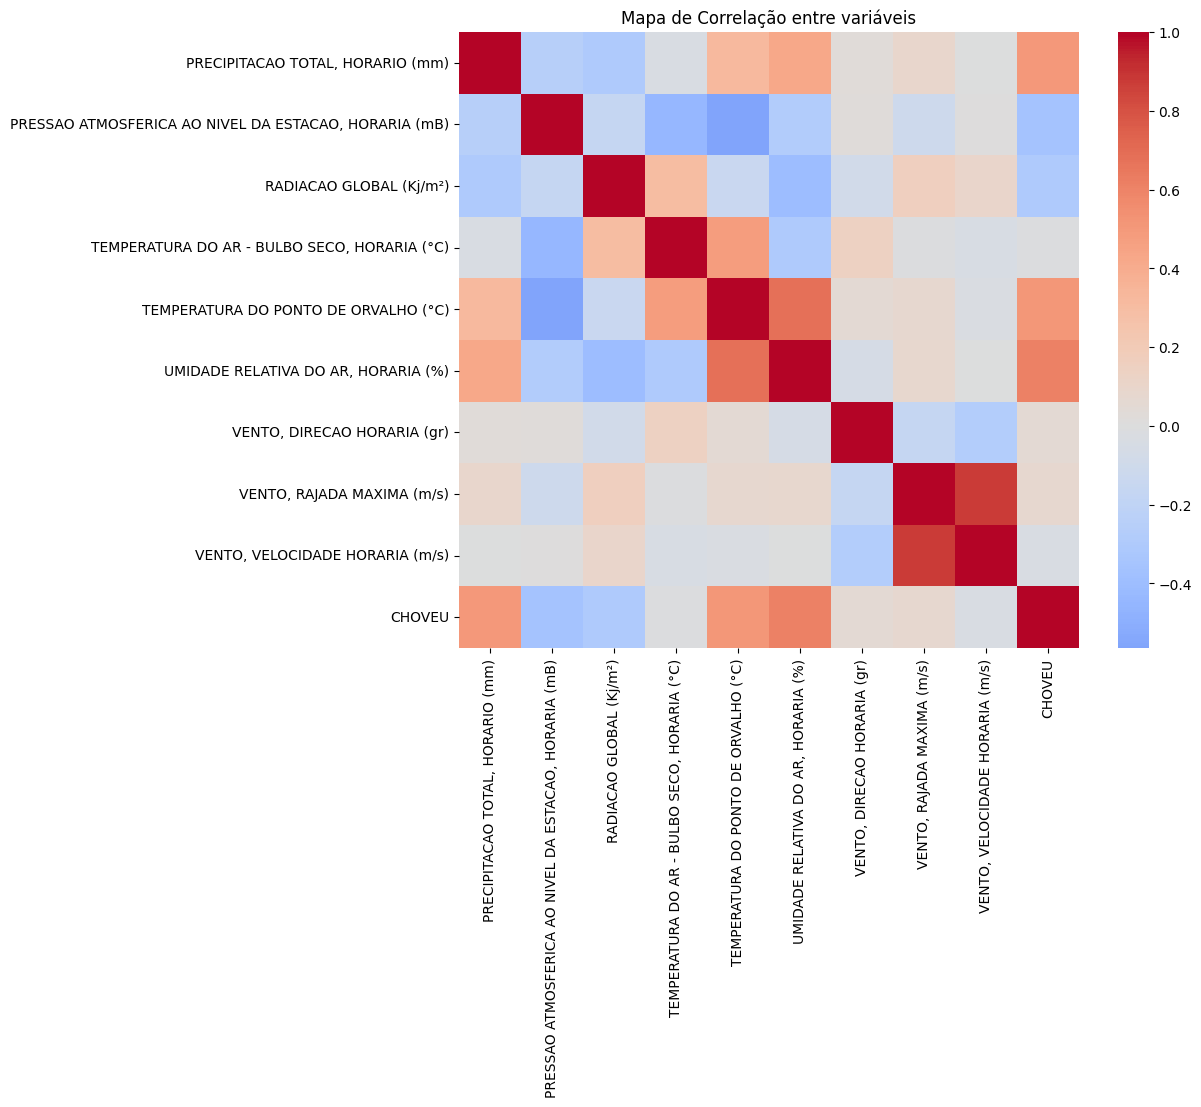

In [ ]:
corr = df_tratado.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Correlação entre variáveis')
plt.show()

O mapa de correlação mostra relações meteorológicas como temperatura do ar, radiação global e temperatura do ponto de orvalho são fortemente correlacionadas entre si, enquanto a umidade relativa apresenta correlação negativa com essas variáveis, indicando que condições mais quentes e com maior radiação tendem a reduzir a umidade. As variáveis de vento (velocidade, rajada e direção) exibem correlações entre si, sugerindo comportamento conjunto. A variável “choveu” apresenta relação moderada com umidade e ponto de orvalho, reforçando que condições mais úmidas favorecem precipitação. Já a pressão atmosférica se correlaciona pouco com as demais variáveis, mostrando influência limitada no conjunto analisado.

### 3.2.4 Pairplot das variáveis com mais relação com a variável alvo

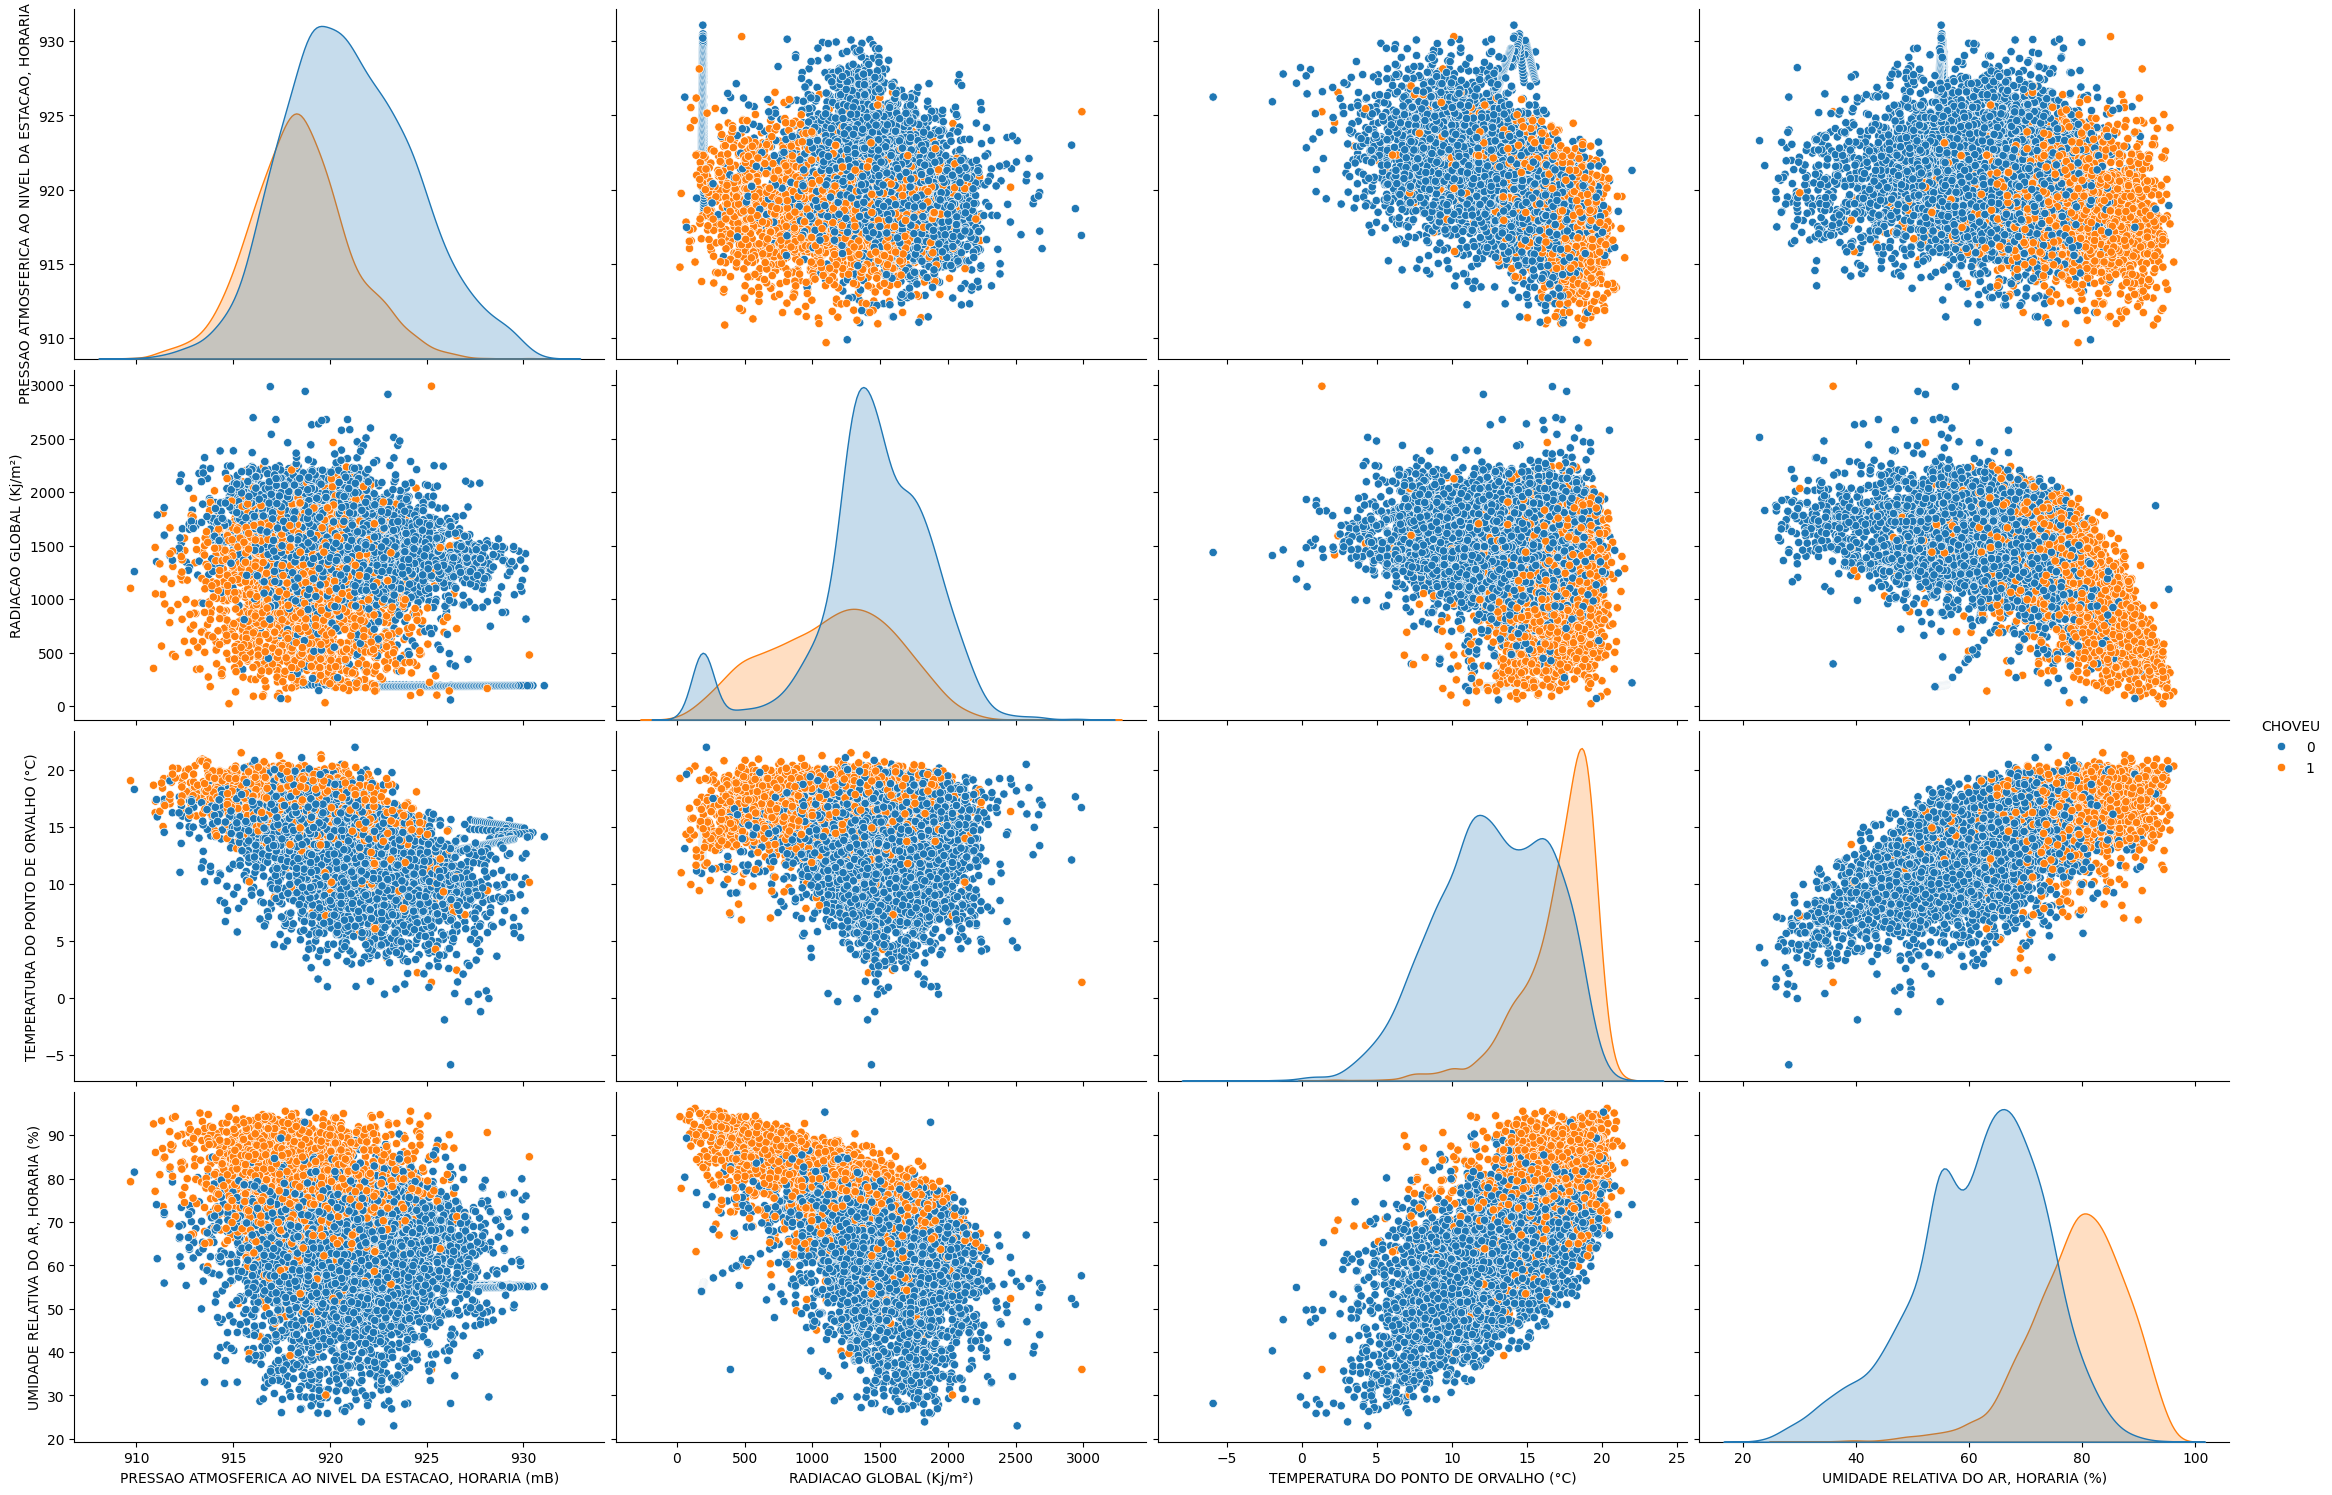

In [ ]:
sns.pairplot(df_tratado[['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)', 'CHOVEU']],
hue='CHOVEU', diag_kind='kde', height=3.8, aspect=1.5)
plt.show()

O pairplot mostra que, nos momentos em que chove, há geralmente mais umidade, menos radiação solar e ponto de orvalho mais alto, enquanto os dias sem chuva ficam mais espalhados em valores maiores dessas variáveis. As nuvens de pontos reforçam essas tendências e sugerem que umidade e radiação são as variáveis que mais diferenciam os dois cenários.

# 4 Treinamento do Modelo e Resultados

In [ ]:
colunas_para_remover = ['CHOVEU', 'Data', 'PRECIPITACAO TOTAL, HORARIO (mm)']

X = df_tratado.drop(colunas_para_remover, axis=1)
y = df_tratado['CHOVEU']

# separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# treinando o modelo
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

print("Acurácia do modelo:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

Acurácia do modelo: 0.8404761904761905

Matriz de Confusão:
[[1259  147]
 [ 188  506]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1406
           1       0.77      0.73      0.75       694

    accuracy                           0.84      2100
   macro avg       0.82      0.81      0.82      2100
weighted avg       0.84      0.84      0.84      2100



/tmp/ipython-input-2684714344.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


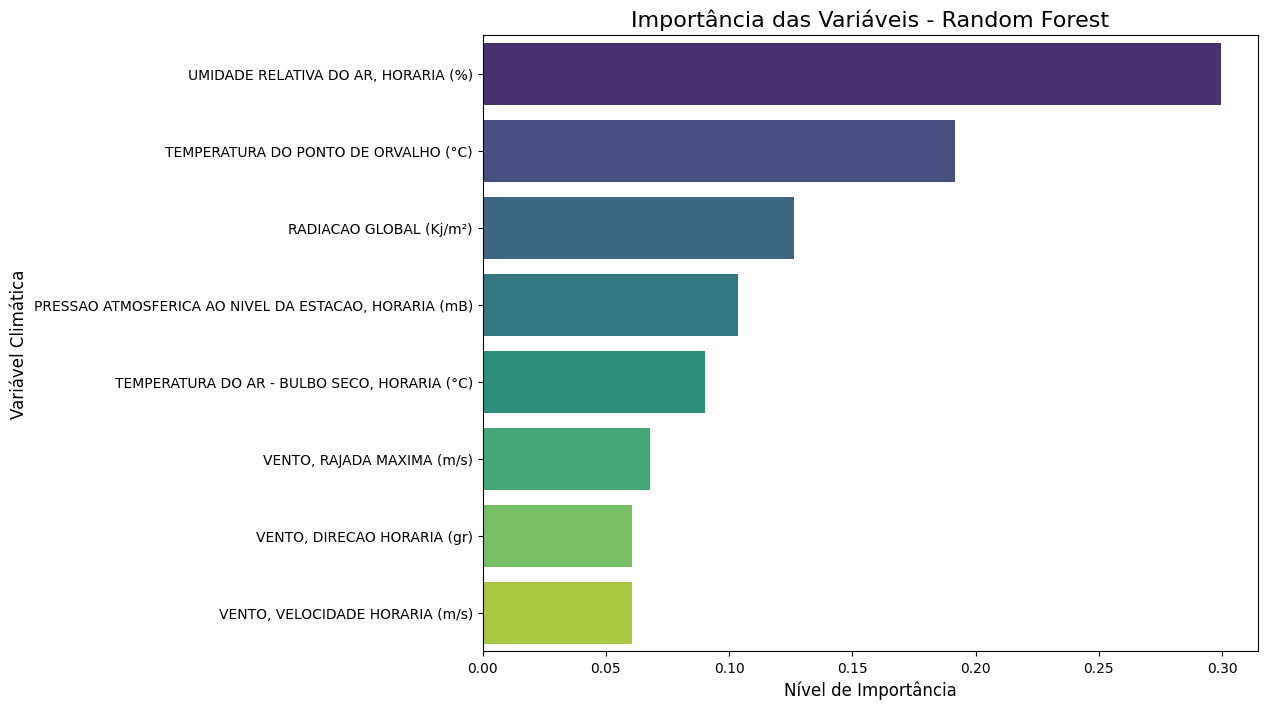

In [ ]:
# lista de importâncias do modelo treinado
importances = modelo_rf.feature_importances_

# nomes das colunas que usamos para treinar
feature_names = X.columns

# criando um DataFrame do pandas para facilitar a visualização
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# ordenando o DataFrame para mostrar as mais importantes primeiro
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df,
    palette='viridis'
)

plt.title('Importância das Variáveis - Random Forest', fontsize=16)
plt.xlabel('Nível de Importância', fontsize=12)
plt.ylabel('Variável Climática', fontsize=12)
plt.show()

Para avaliar melhor o modelo, comparamos a previsão de cada árvore individual com a previsão final do Random Forest. A árvore com maior acurácia/erro mínimo em relação ao modelo final é a mais representativa e vamos visualizá-la.

In [ ]:
rf_pred = modelo_rf.predict(X)

scores =[]

for i, arvore in enumerate(modelo_rf.estimators_):
  tree_pred = arvore.predict(X.values)
  accuracy = np.mean(tree_pred == rf_pred)
  scores.append((i, accuracy))

best_idx,best_score = max(scores, key=lambda x: x[1])

print(f"Árvore mais representativa: {best_idx}")
print(f"Acurácia: {best_score:.4f}")

Árvore mais representativa: 35
Acurácia: 0.9137


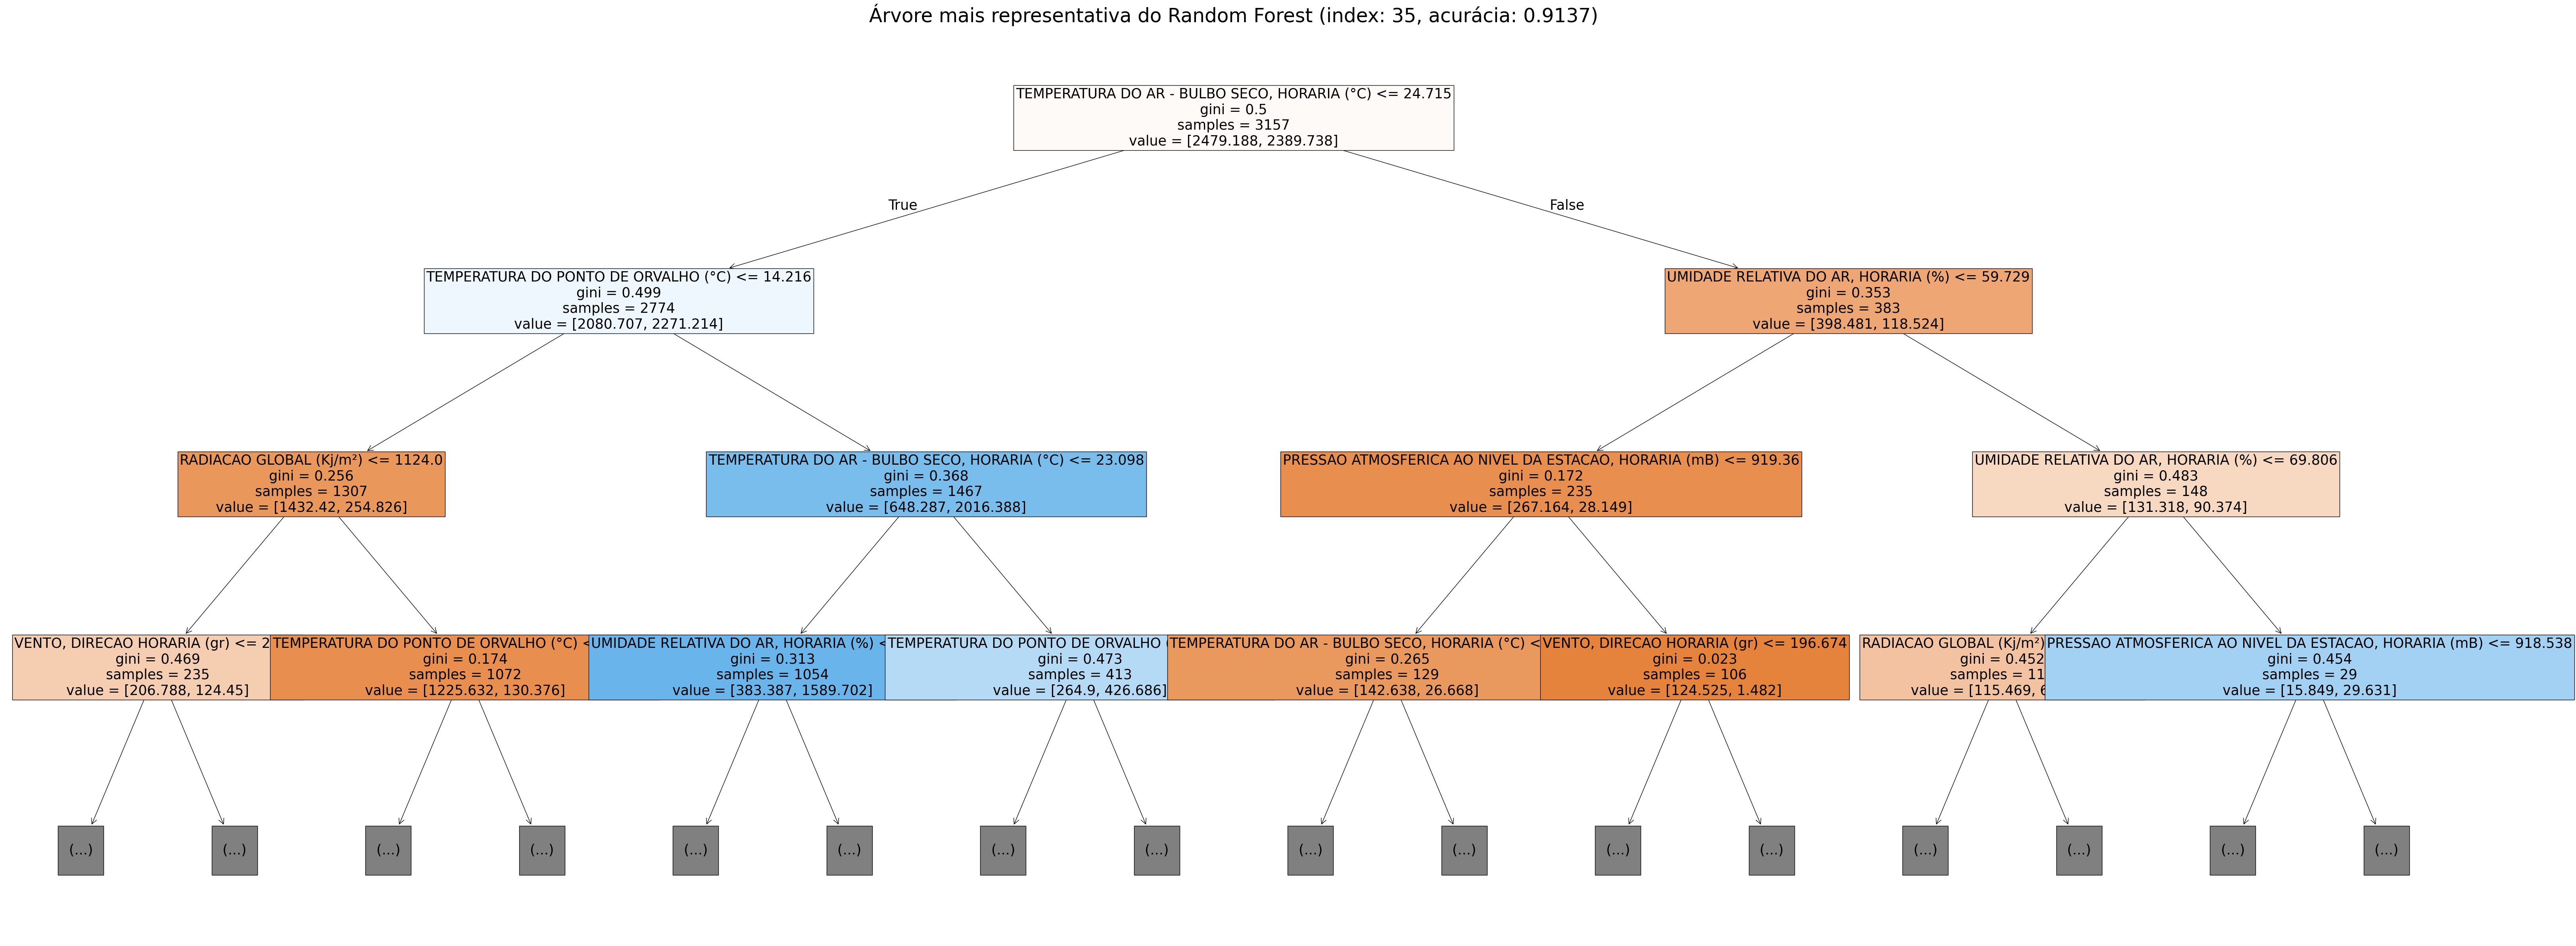

In [ ]:
plt.figure(figsize=(80,30))

tree.plot_tree(modelo_rf.estimators_[best_idx],
              feature_names=X.columns,
              filled=True,
              max_depth=3,
              fontsize=25)
plt.title(f"Árvore mais representativa do Random Forest (index: {best_idx}, acurácia: {best_score:.4f})", fontsize=35)
plt.show()


In [ ]:
import requests
from datetime import datetime, timedelta

LAT = -22.02     # Coordenadas de São Carlos
LON = -47.89
tomorrow = datetime.now().date() + timedelta(days=1)

# API gratuita (Open-Meteo)
url = "https://api.open-meteo.com/v1/forecast"

params = {
    "latitude": LAT,
    "longitude": LON,
    "hourly": "temperature_2m,dewpoint_2m,relativehumidity_2m,pressure_msl,shortwave_radiation,windspeed_10m,windgusts_10m,winddirection_10m",
    "timezone": "America/Sao_Paulo"
}
print("Baixando dados meteorológicos de amanhã")
resp = requests.get(url, params=params)
data = resp.json()

df = pd.DataFrame({
    "time": pd.to_datetime(data["hourly"]["time"]),
    "temp": data["hourly"]["temperature_2m"],
    "dew": data["hourly"]["dewpoint_2m"],
    "humidity": data["hourly"]["relativehumidity_2m"],
    "pressure": data["hourly"]["pressure_msl"],
    "radiation": data["hourly"]["shortwave_radiation"],
    "wind_speed": data["hourly"]["windspeed_10m"],      h
    "wind_gust": data["hourly"]["windgusts_10m"],
    "wind_dir": data["hourly"]["winddirection_10m"]
})

# Filtrar apenas dados do dia de amanhã
df_tomorrow = df[df["time"].dt.date == tomorrow]

if df_tomorrow.empty:
    raise ValueError("Ainda não há dados disponíveis para amanhã")

# Convertendo km/h → m/s
df_tomorrow["wind_speed"] = df_tomorrow["wind_speed"] / 3.6
df_tomorrow["wind_gust"] = df_tomorrow["wind_gust"] / 3.6

# Radiação global diária:
# W/m² * 1h → Wh/m² → * 3.6 → kJ/m²
total_radiation_kJ = df_tomorrow["radiation"].sum() * 3.6

# Médias
mean_temp = df_tomorrow["temp"].mean()
mean_dew = df_tomorrow["dew"].mean()
mean_humidity = df_tomorrow["humidity"].mean()
mean_pressure = df_tomorrow["pressure"].mean()
mean_wind_speed = df_tomorrow["wind_speed"].mean()
max_wind_gust = df_tomorrow["wind_gust"].max()
mean_wind_dir = df_tomorrow["wind_dir"].mean()

linha = {
    "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)": mean_pressure,
    "RADIACAO GLOBAL (Kj/m²)": total_radiation_kJ,
    "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)": mean_temp,
    "TEMPERATURA DO PONTO DE ORVALHO (°C)": mean_dew,
    "UMIDADE RELATIVA DO AR, HORARIA (%)": mean_humidity,
    "VENTO, DIRECAO HORARIA (gr)": mean_wind_dir,
    "VENTO, RAJADA MAXIMA (m/s)": max_wind_gust,
    "VENTO, VELOCIDADE HORARIA (m/s)": mean_wind_speed
}

X_novo = pd.DataFrame([linha])

print("\n===== VALORES PREVISTOS PARA AMANHÃ =====")
print(X_novo)
print("=========================================\n")

y_pred = modelo_rf.predict(X_novo)[0]

print("PREVISÃO DO MODELO PARA AMANHÃ:")
print(" **VAI CHOVER**" if y_pred == 1 else " **NÃO VAI CHOVER**")


Baixando dados meteorológicos de amanhã

===== VALORES PREVISTOS PARA AMANHÃ =====
   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                          1012.5125       

   RADIACAO GLOBAL (Kj/m²)  TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                  31827.6                                     22.316667   

   TEMPERATURA DO PONTO DE ORVALHO (°C)  UMIDADE RELATIVA DO AR, HORARIA (%)  \
0                             12.070833                            56.291667   

   VENTO, DIRECAO HORARIA (gr)  VENTO, RAJADA MAXIMA (m/s)  \
0                   178.291667                    8.805556   

   VENTO, VELOCIDADE HORARIA (m/s)  
0                         2.040509  

PREVISÃO DO MODELO PARA AMANHÃ:
 **NÃO VAI CHOVER**


/tmp/ipython-input-2774446505.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomorrow["wind_speed"] = df_tomorrow["wind_speed"] / 3.6
/tmp/ipython-input-2774446505.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomorrow["wind_gust"] = df_tomorrow["wind_gust"] / 3.6
